<a href="https://colab.research.google.com/github/mayssajeb/Reconnaissance-Signature/blob/master/Verif_Signature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Vérification Signature Manuscrite avec le deep Learning (CNN)**

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/My Drive/Stage_Wevioo_VérififcationSignature/Stage_Wevioo/BHSig260 - Copie/Hindi"

001  014  027  040  053  066  107  120	134  147  160
002  015  028  041  054  067  108  121	135  148  Hindi_pairs.txt
003  016  029  042  055  068  109  122	136  149  list.forgery
004  017  030  043  056  069  110  123	137  150  list.genuine
005  018  031  044  057  070  111  124	138  151  TestVerif.ipynb
006  019  032  045  058  071  112  125	139  152
007  020  033  046  059  098  113  127	140  153
008  021  034  047  060  099  114  128	141  154
009  022  035  048  061  100  115  129	142  155
010  023  036  049  062  103  116  130	143  156
011  024  037  050  063  104  117  131	144  157
012  025  038  051  064  105  118  132	145  158
013  026  039  052  065  106  119  133	146  159


In [0]:
import torch
import numpy as np
from torchvision import transforms, models, datasets

In [0]:
#Comment 0: define transformation that you wish to apply on image
data_transforms = transforms.Compose([
                    transforms.CenterCrop(224),
                    transforms.ToTensor()])

In [0]:
# Comment 1 : Load the datasets with ImageFolder
image_datasets = datasets.ImageFolder(root= "/content/drive/My Drive/Stage_Wevioo_VérififcationSignature/Stage_Wevioo/BHSig260 - Copie/Hindi", transform=data_transforms)

In [0]:
#Comment 2: Using the image datasets and the trainforms, define the dataloaders
dataloaders = torch.utils.data.DataLoader(image_datasets, batch_size=32, shuffle=True, num_workers=2)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image


dataiter = iter(dataloaders)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

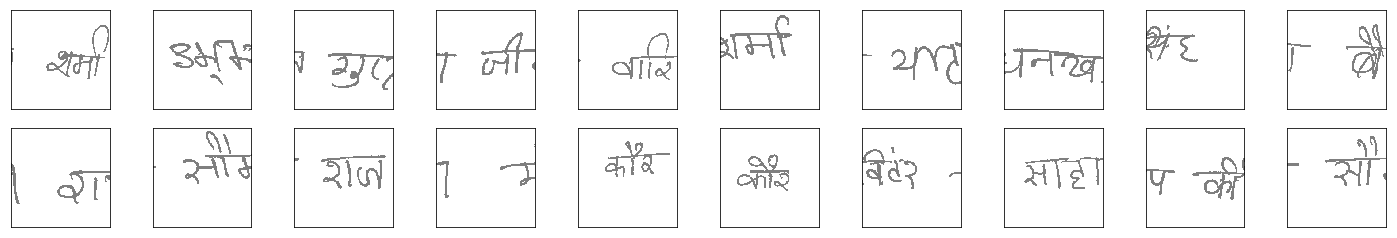

In [0]:
# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

In [0]:
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle

import tensorflow as tf
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import Concatenate
from keras.layers.core import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.engine.topology import Layer
from keras.regularizers import l2
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

Using TensorFlow backend.
